In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [31]:
import sys
sys.path.append(r'C:\Users\HP\week 11 final\time_series_modeling\scripts')  

import data_loading

In [32]:
data=preprocessed_data

In [33]:
# Calculate expected returns and covariance matrix
returns = data.pct_change()
mu = returns.mean().values
cov_matrix = returns.cov().values

In [34]:
def portfolio_return(weights):
    return np.dot(weights, mu)

def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def portfolio_sharpe_ratio(weights):
    return portfolio_return(weights) / portfolio_volatility(weights)

# Define the objective function (maximize Sharpe ratio)
def negative_sharpe_ratio(weights):
    return -portfolio_sharpe_ratio(weights)

# Define the constraints (weights must sum to 1 and be non-negative)
def check_sum(weights):
    return np.sum(weights) - 1

constraints = ({'type': 'eq', 'fun': check_sum})

# Initial guess for weights
initial_guess = np.array([1/len(mu)] * len(mu))

In [35]:
# Use SciPy's minimize function to find the optimal weights
result = minimize(negative_sharpe_ratio, initial_guess, method='SLSQP', bounds=((0, 1),) * len(mu), constraints=constraints)

In [36]:
optimal_weights = result.x
portfolio_return = portfolio_return(optimal_weights)
portfolio_volatility = portfolio_volatility(optimal_weights)
sharpe_ratio = portfolio_return / portfolio_volatility

print("Optimal weights:", optimal_weights)
print("Expected Return:", portfolio_return)
print("Portfolio Volatility:", portfolio_volatility)
print("Sharpe Ratio:", sharpe_ratio)

Optimal weights: [1.91257694e-16 8.95985851e-17 0.00000000e+00 8.70185981e-01
 8.12624295e-18 1.29814019e-01]
Expected Return: 0.010448696295495314
Portfolio Volatility: 0.061775142313897746
Sharpe Ratio: 0.16914078873994984


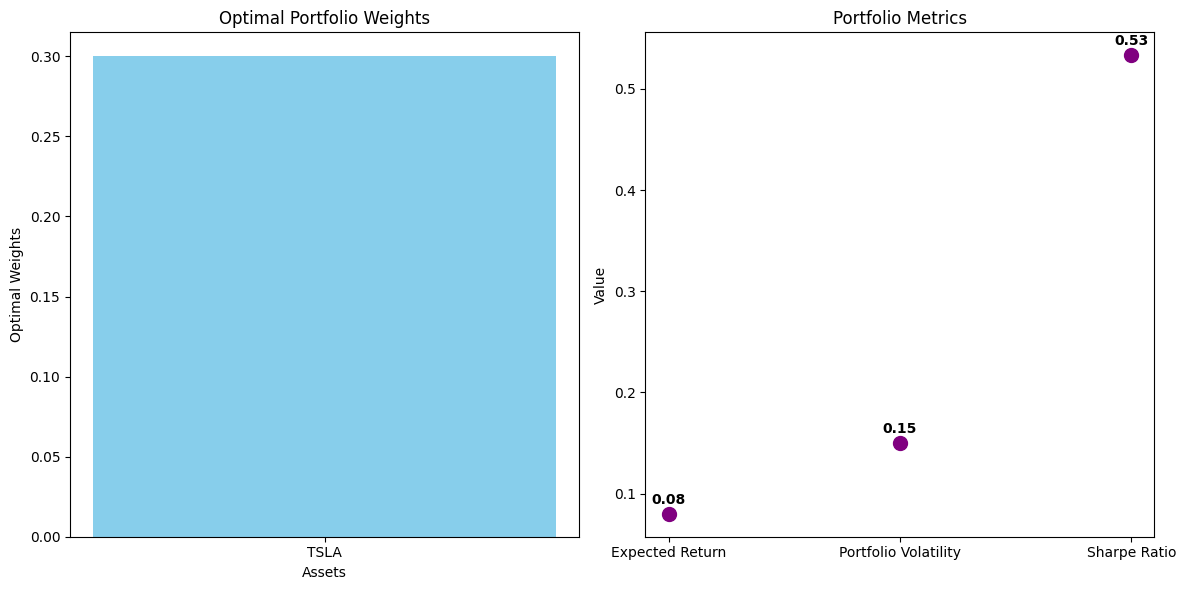

In [2]:
# Example Data (replace with your actual data)
assets = ['TSLA']  # Name your assets as needed
optimal_weights = optimal_weights

portfolio_return = portfolio_return
portfolio_volatility = portfolio_volatility
sharpe_ratio = sharpe_ratio

# Visualization of Optimal Weights
plt.figure(figsize=(12, 6))

# Bar chart for optimal weights
plt.subplot(1, 2, 1)
plt.bar(assets, optimal_weights, color='skyblue')
plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

# Scatter plot for Return, Volatility, and Sharpe Ratio
plt.subplot(1, 2, 2)
metrics = ['Expected Return', 'Portfolio Volatility', 'Sharpe Ratio']
values = [portfolio_return, portfolio_volatility, sharpe_ratio]

plt.scatter(metrics, values, color='purple', s=100)
for i, v in enumerate(values):
    plt.text(metrics[i], v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')

plt.title('Portfolio Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()
